Neste notebook faremos uma análise exploratória dos dados pré-processados da Wyscout, com foco em preparar os dados para a modelagem no notebook seguinte

In [26]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mplsoccer import VerticalPitch

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#other
import aux_functions_plot as p

## Leitura e análise exploratória inicial dos dados


In [28]:
shots = pd.read_parquet('./data/shots_dataframe.parquet')

In [29]:
goals = shots[shots["goal"] == 1]

In [4]:
shots.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,wyId,foot,firstName,lastName,previous_event,x,y,c,distance,angle,goal,free_kick,counter_attack,rebound,prev_cross,prev_touch,prev_pass,prev_smart_pass,prev_duel
653947,10,Shot,"[{'id': 402}, {'id': 1401}, {'id': 1203}, {'id...",25437,"[{'x': 91, 'y': 29}, {'x': 0, 'y': 0}]",1694390,Shot,4418,1H,31.226217,100,88178649,25437,left,Blaise,Matuidi,Head pass,9.45,19.72,14.28,17.123694,0.242346,0,0,0,0,0,0,1,0,0
663862,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1216}, {'id'...",83824,"[{'x': 71, 'y': 29}, {'x': 100, 'y': 100}]",1694390,Shot,11944,1H,143.119551,100,88178722,83824,right,Mihai Doru,Pintilii,Simple pass,30.45,19.72,14.28,33.632141,0.196835,0,0,0,0,0,0,1,0,0
666892,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",33235,"[{'x': 96, 'y': 57}, {'x': 100, 'y': 100}]",1694390,Shot,11944,1H,219.576026,100,88178751,33235,right,Bogdan Sorin,Stancu,Air duel,4.20,38.76,4.76,6.348039,0.851948,0,0,0,0,0,0,0,0,1
659593,10,Shot,"[{'id': 403}, {'id': 201}, {'id': 1215}, {'id'...",6165,"[{'x': 96, 'y': 61}, {'x': 100, 'y': 100}]",1694390,Shot,11944,1H,247.532561,100,88373458,6165,right,Florin,Andone,Air duel,4.20,41.48,7.48,8.578485,0.472204,0,0,0,0,0,0,0,0,1
651342,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 1802}]",3682,"[{'x': 75, 'y': 33}, {'x': 0, 'y': 0}]",1694390,Shot,4418,1H,557.319065,100,88178811,3682,left,Antoine,Griezmann,Simple pass,26.25,22.44,11.56,28.682679,0.233111,0,0,0,0,0,0,1,0,0


In [5]:
shots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45284 entries, 653947 to 2781052
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eventId          45284 non-null  int64  
 1   subEventName     45284 non-null  object 
 2   tags             45284 non-null  object 
 3   playerId         45284 non-null  int64  
 4   positions        45284 non-null  object 
 5   matchId          45284 non-null  int64  
 6   eventName        45284 non-null  object 
 7   teamId           45284 non-null  int64  
 8   matchPeriod      45284 non-null  object 
 9   eventSec         45284 non-null  float64
 10  subEventId       45284 non-null  int64  
 11  id               45284 non-null  int64  
 12  wyId             45284 non-null  int64  
 13  foot             45284 non-null  object 
 14  firstName        45284 non-null  object 
 15  lastName         45284 non-null  object 
 16  previous_event   45284 non-null  object 
 17  x    

In [6]:
shots.isna().mean()

eventId            0.0
subEventName       0.0
tags               0.0
playerId           0.0
positions          0.0
matchId            0.0
eventName          0.0
teamId             0.0
matchPeriod        0.0
eventSec           0.0
subEventId         0.0
id                 0.0
wyId               0.0
foot               0.0
firstName          0.0
lastName           0.0
previous_event     0.0
x                  0.0
y                  0.0
c                  0.0
distance           0.0
angle              0.0
goal               0.0
free_kick          0.0
counter_attack     0.0
rebound            0.0
prev_cross         0.0
prev_touch         0.0
prev_pass          0.0
prev_smart_pass    0.0
prev_duel          0.0
dtype: float64

In [14]:
shots.columns

Index(['eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId',
       'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id',
       'wyId', 'foot', 'firstName', 'lastName', 'previous_event', 'x', 'y',
       'c', 'distance', 'angle', 'goal', 'free_kick', 'counter_attack',
       'rebound', 'prev_cross', 'prev_touch', 'prev_pass', 'prev_smart_pass',
       'prev_duel'],
      dtype='object')

### Avaliando a distribuição de algumas features

In [16]:
shots.groupby('subEventName').size().sort_values()

subEventName
Free kick shot     2209
Shot              43075
dtype: int64

In [18]:
shots.groupby('eventName').size().sort_values()

eventName
Free Kick     2209
Shot         43075
dtype: int64

Estas 2 variáveis estão redundantes, poderemos excluir uma delas

In [19]:
shots.groupby('previous_event').size().sort_values()

previous_event
                               1
Time lost foul                 1
Penalty                        3
Violent Foul                   3
Late card foul                 6
Hand pass                      7
Out of game foul              12
Goal kick                     19
Protest                       23
Free kick shot                32
Launch                        60
Hand foul                     87
Throw in                     126
Save attempt                 131
Free Kick                    150
Goalkeeper leaving line      162
Shot                         216
Free kick cross              484
Reflexes                     526
Acceleration                 777
High pass                    915
Head pass                    939
Corner                       989
Ground loose ball duel      1446
Smart pass                  1809
Clearance                   2059
Foul                        2099
Touch                       3003
Cross                       4057
Ground defending duel       

### Avaliando o target 

In [20]:
shots.groupby('goal').size().sort_values()

goal
1     4629
0    40655
dtype: int64

<AxesSubplot: xlabel='goal', ylabel='Count'>

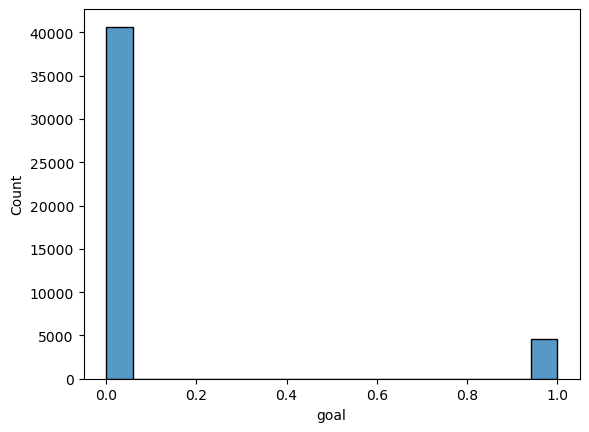

In [22]:
sns.histplot(shots['goal'])

### Avaliando a posição de onde os chutes partem

In [7]:
nb_shots, x,y, df_shots = p.prepare_heatmap(shots, 'x', 'y', 24,17, return_df = True)
share_shots = nb_shots / nb_shots.sum() * 100

/Users/lucasmaretti/Documents/repos/football_analytics/aux_functions_plot.py:500: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_img = df_pos.pivot(col_y + "ZoneMean", col_x + "ZoneMean", "aggVal")


In [10]:
share_shots = nb_shots / nb_shots.sum() * 100
# plot the heatmap
dict_info = {"Proporção de chutes (em %)": {"values": share_shots, "display_type": ".2f"},
             "Número de chutes": {"values": nb_shots, "display_type": ".0f"}}
fig = p.create_heatmap(x, y, share_shots, dict_info, title_name="Posição dos chutes")
fig.show()

Podemos observar que a maioria dos chutes parte de dentro da área adversária, o que faz sentido. Vamos plotar agora de onde saíra os chutes que de fato resultaram em gol

In [23]:

# numero de chutes por grid
nb_goals, x, y = p.prepare_heatmap(goals, "x", "y", 24, 17)

goal_proba = np.divide(nb_goals, nb_shots, out=np.zeros_like(nb_goals), where=nb_shots!=0) * 100


# plotando o heatmap
dict_info = {"Probabilidade de marcar (em %)": {"values": goal_proba, "display_type": ".1f"},
             "Fração de chutes (em %)": {"values": share_shots, "display_type": ".2f"},
             "Numero de chutes": {"values": nb_shots, "display_type": ".0f"},
             "Numero de goals": {"values": nb_goals, "display_type": ".0f"}}
fig = p.create_heatmap(x, y, goal_proba, dict_info, title_name="Probabilidade de marcar")
fig.show()

/Users/lucasmaretti/Documents/repos/football_analytics/aux_functions_plot.py:500: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



É possível notar que a probabilidade marcar é maior quando se está na área adversária. Curioso notar também que existem alguns outliers no dataset, que são gols que são marcados de muito longe, incluindo um caso que o chute partiu da área adversária e outro da lateral do campo na altura do círculo central. Vamos olhar mais de perto dentro da área no próximo plot

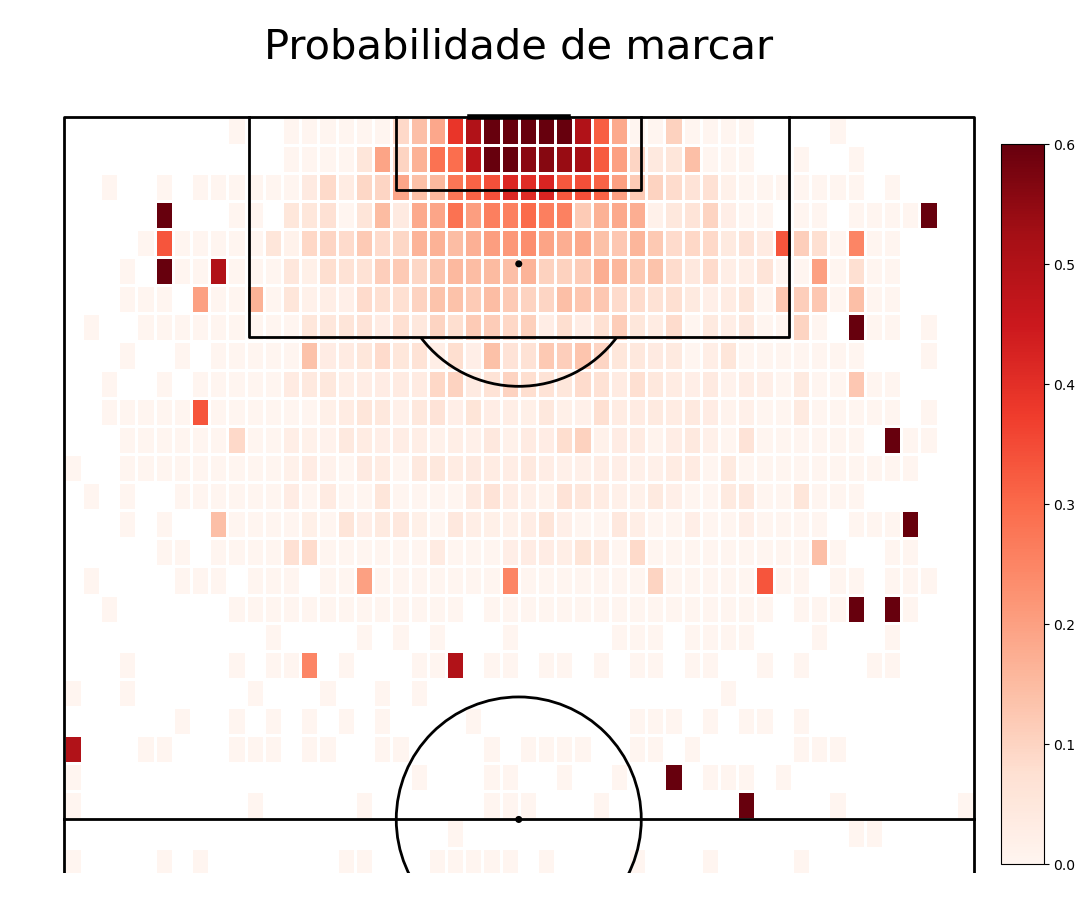

In [32]:
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(105 - shots['x'], shots['y'], bins = 50)
#normalize number of goals by number of shots
bin_statistic_goals = pitch.bin_statistic(105 - goals['x'], goals['y'], bins=50)
bin_statistic["statistic"] = bin_statistic_goals["statistic"]/bin_statistic["statistic"]
#plot heatmap
pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Reds', edgecolor='white', vmin = 0, vmax = 0.6)
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Probabilidade de marcar' , fontsize = 30)
plt.show()

<AxesSubplot: xlabel='x', ylabel='Count'>

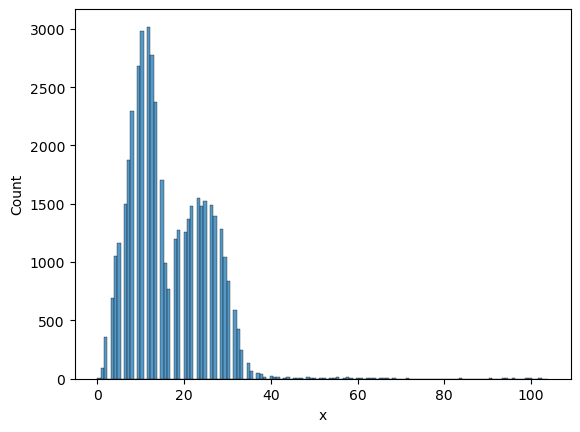

In [35]:
sns.histplot(shots['x'])

<AxesSubplot: xlabel='angle', ylabel='Count'>

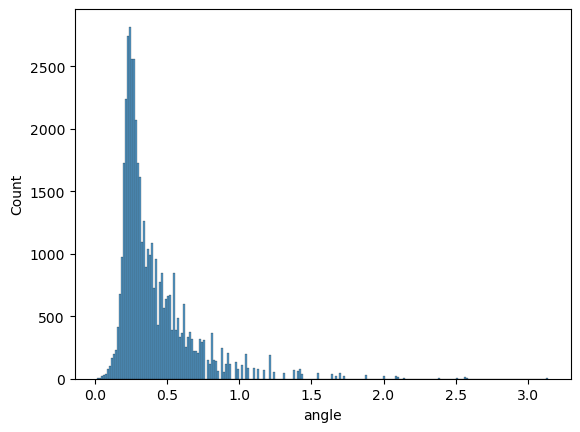

In [43]:
sns.histplot(shots['angle'])

In [42]:
outliers = shots[(shots['x'] > 40) & shots['goal'] == 1]
outliers

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,wyId,foot,firstName,lastName,previous_event,x,y,c,distance,angle,goal,free_kick,counter_attack,rebound,prev_cross,prev_touch,prev_pass,prev_smart_pass,prev_duel
209489,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",7944,"[{'x': 44, 'y': 40}, {'x': 0, 'y': 0}]",2499856,Shot,1623,2H,1254.782389,100,210484394,7944,right,Wayne,Rooney,Simple pass,58.80,27.20,6.80,59.191891,0.122699,1,0,0,0,0,0,1,0,0
1034573,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",28115,"[{'x': 53, 'y': 32}, {'x': 0, 'y': 0}]",2500707,Shot,3766,1H,559.297626,100,180038263,28115,left,Nabil,Fekir,Touch,49.35,21.76,12.24,50.845256,0.139547,1,0,0,0,0,1,0,0,0
1200748,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",25715,"[{'x': 51, 'y': 25}, {'x': 100, 'y': 100}]",2500888,Shot,3783,2H,2893.810499,100,221554614,25715,right,Ronny,Rodelin,Simple pass,51.45,17.00,17.00,54.185815,0.128152,1,0,0,0,0,0,1,0,0
1643009,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 1401}, {'id'...",14734,"[{'x': 60, 'y': 72}, {'x': 100, 'y': 100}]",2516911,Shot,2453,2H,1334.772942,100,223975587,14734,right,Nils,Petersen,Simple pass,42.00,48.96,14.96,44.584769,0.154472,1,0,0,0,0,0,1,0,0
1890845,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",224680,"[{'x': 55, 'y': 100}, {'x': 0, 'y': 0}]",2516933,Shot,2462,2H,1263.092525,100,227230696,224680,right,Marius,Wolf,Simple pass,47.25,68.00,34.00,58.211361,0.102118,1,0,0,0,0,0,1,0,0
1689948,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",15069,"[{'x': 8, 'y': 49}, {'x': 100, 'y': 100}]",2516989,Shot,2975,2H,482.920385,100,238892068,15069,right,Willi,Orban,Cross,96.60,33.32,0.68,96.602393,0.075736,1,0,0,0,1,0,0,0,0
1693108,10,Shot,"[{'id': 101}, {'id': 1901}, {'id': 402}, {'id'...",56274,"[{'x': 3, 'y': 49}, {'x': 100, 'y': 100}]",2516989,Shot,2975,2H,1858.745879,100,238892453,56274,right,Yussuf,Yurary Poulsen,Cross,101.85,33.32,0.68,101.852270,0.071836,1,0,1,0,1,0,0,0,0
2119524,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",4015,"[{'x': 1, 'y': 51}, {'x': 0, 'y': 0}]",2565775,Shot,680,2H,37.063761,100,227470407,4015,left,Pablo,Sarabia Garc\u00eda,Reflexes,103.95,34.68,0.68,103.952224,0.070386,1,0,0,0,0,0,0,0,0


In [40]:
nb_shots, x,y, df_shots = p.prepare_heatmap(outliers, 'x', 'y', 24,17, return_df = True)
share_shots = nb_shots / nb_shots.sum() * 100

# plot the heatmap
dict_info = {"Proporção de chutes (em %)": {"values": share_shots, "display_type": ".2f"},
             "Número de chutes": {"values": nb_shots, "display_type": ".0f"}}
fig = p.create_heatmap(x, y, share_shots, dict_info, title_name="Posição dos chutes outliers")
fig.show()

/Users/lucasmaretti/Documents/repos/football_analytics/aux_functions_plot.py:500: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



In [41]:
outliers.shape[0]/goals.shape[0] * 100

0.17282350399654353

Os gols outliers representam uma fração irrisória do total de gols. Como o futebol é um jogo sujeito a aleatoriedades

### Hipótese 1) Existe alguma relação entre o ângulo do chute e gols?

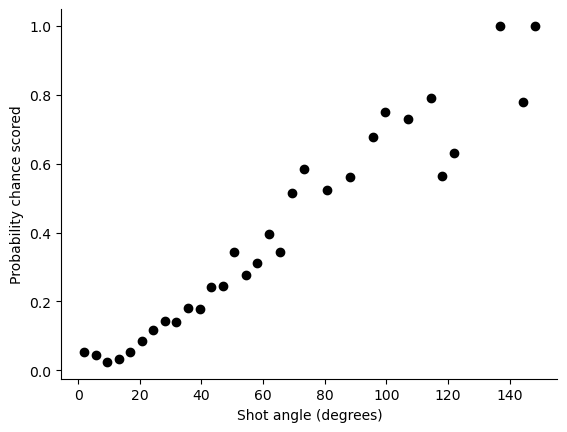

In [25]:
#number of shots from angle
shotcount_dist = np.histogram(data['angle']*180/np.pi, bins=40, range=[0, 150])
#number of goals from angle
goalcount_dist = np.histogram(goals['angle']*180/np.pi, bins=40, range=[0, 150])
np.seterr(divide='ignore', invalid='ignore')
#probability of scoring goal
prob_goal = np.divide(goalcount_dist[0], shotcount_dist[0])
angle = shotcount_dist[1]
midangle = (angle[:-1] + angle[1:])/2
#make plot
fig,ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()